In [36]:
# import data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import math
# load data
data = pd.read_csv('Lab9_trial1.csv')
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.00,0.000,0.0,0.0
1,0.05,0.000,0.0,0.0
2,0.10,0.000,0.0,0.0
3,0.15,0.000,0.0,0.0
4,0.20,0.000,0.0,0.0
...,...,...,...,...
596,29.80,2.037,0.0,0.0
597,29.85,2.037,0.0,0.0
598,29.90,2.037,0.0,0.0
599,29.95,2.037,0.0,0.0


In [37]:
# set constants for measured quantities
CART_MASS = Decimal('.329') # kg
STARTING_HEIGHT = Decimal('.083') # meters
TRACK_LENGTH = Decimal('2.22') # meters

We must subtract 4cm from all of our position values to account for 
releasing our cart past where the block met the track.

In [38]:
data.iloc[:, 1] = data.iloc[:, 1].sub(.04)
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.00,-0.040,0.0,0.0
1,0.05,-0.040,0.0,0.0
2,0.10,-0.040,0.0,0.0
3,0.15,-0.040,0.0,0.0
4,0.20,-0.040,0.0,0.0
...,...,...,...,...
596,29.80,1.997,0.0,0.0
597,29.85,1.997,0.0,0.0
598,29.90,1.997,0.0,0.0
599,29.95,1.997,0.0,0.0


The next step is creating a functions of the kinetic and potential energy of the cart in terms of our measured quantites.

In [45]:
# add column for kinetic energy: 1/2CART_MASS*col2^2
data["Kinetic Energy (J): 1/2mv^2"] = 1/2*(float(CART_MASS)*data["Latest: Velocity (m/s)"]**2)
# add column for potential energy: hmg, h = STARTING_HEIGHT/(TRACK_LENGTH)
data["Potential Energy (J)"] = float(STARTING_HEIGHT/(TRACK_LENGTH))*(float(TRACK_LENGTH) - data["Latest: Position (m)"])*float(CART_MASS)*9.81
# one more for the total energy in the system
data["Total Energy(J)"] = data["Kinetic Energy (J): 1/2mv^2"] + data["Potential Energy (J)"]
# show table
data[200:210]

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²),Kinetic Energy (J): 1/2mv^2,Potential Energy (J),Total Energy(J)
200,10.00,1.607,0.475000,0.170370,0.037115,0.073969,0.111084
201,10.05,1.631,0.487778,0.189815,0.039139,0.071073,0.110212
202,10.10,1.656,0.497222,0.157099,0.040669,0.068056,0.108726
203,10.15,1.681,0.502222,0.140432,0.041491,0.065040,0.106531
204,10.20,1.706,0.510000,0.145062,0.042786,0.062023,0.104810
205,10.25,1.732,0.517778,0.140432,0.044101,0.058886,0.102987
206,10.30,1.758,0.522778,0.157099,0.044957,0.055748,0.100706
207,10.35,1.784,0.532222,0.189815,0.046596,0.052611,0.099207
208,10.40,1.811,0.545000,0.170370,0.048861,0.049353,0.098214
209,10.45,1.839,0.550000,0.138580,0.049761,0.045974,0.095736


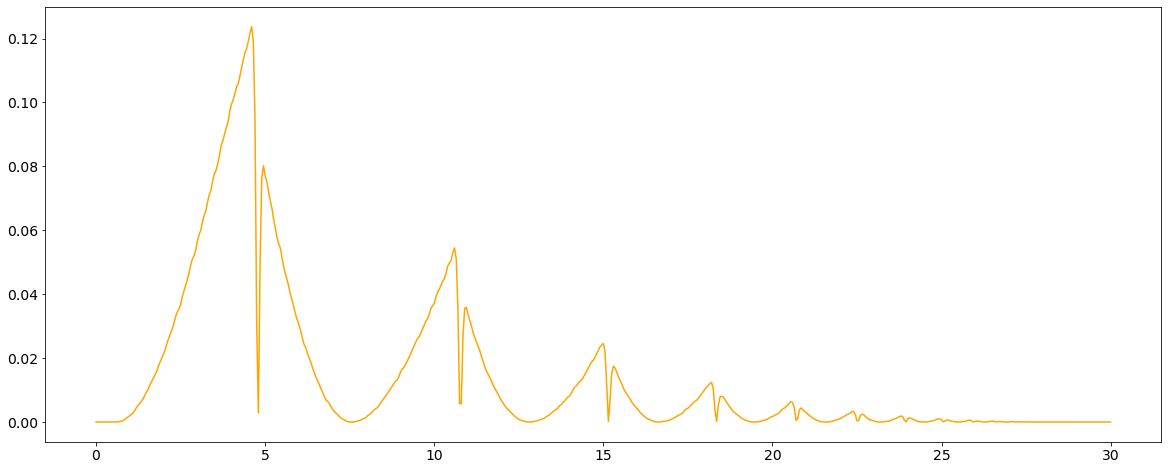

In [48]:
plt.plot(data["Latest: Time (s)"], data["Kinetic Energy (J): 1/2mv^2"], color="orange")
plt.show()

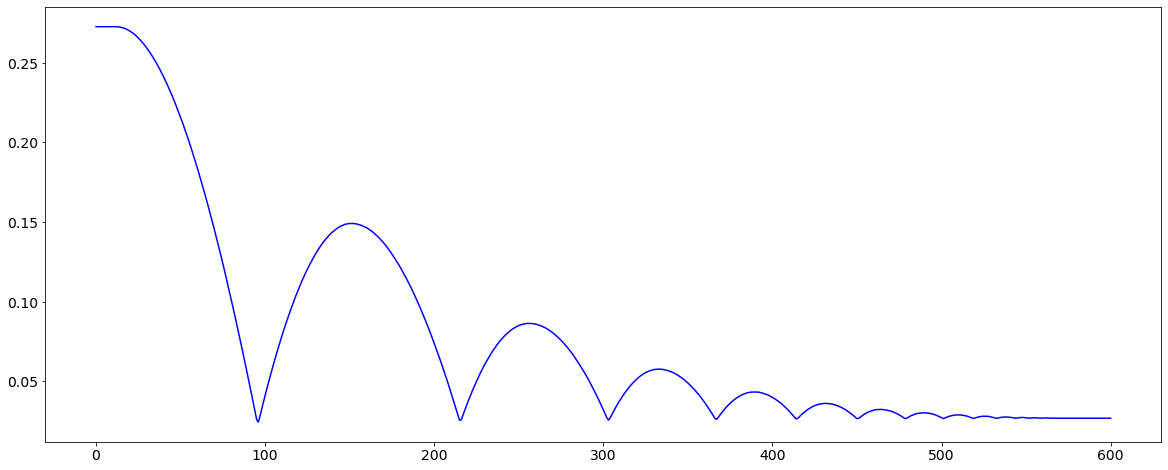

In [47]:
# display potential energy graph
plt.plot(data["Potential Energy (J)"], color='blue')
plt.show()

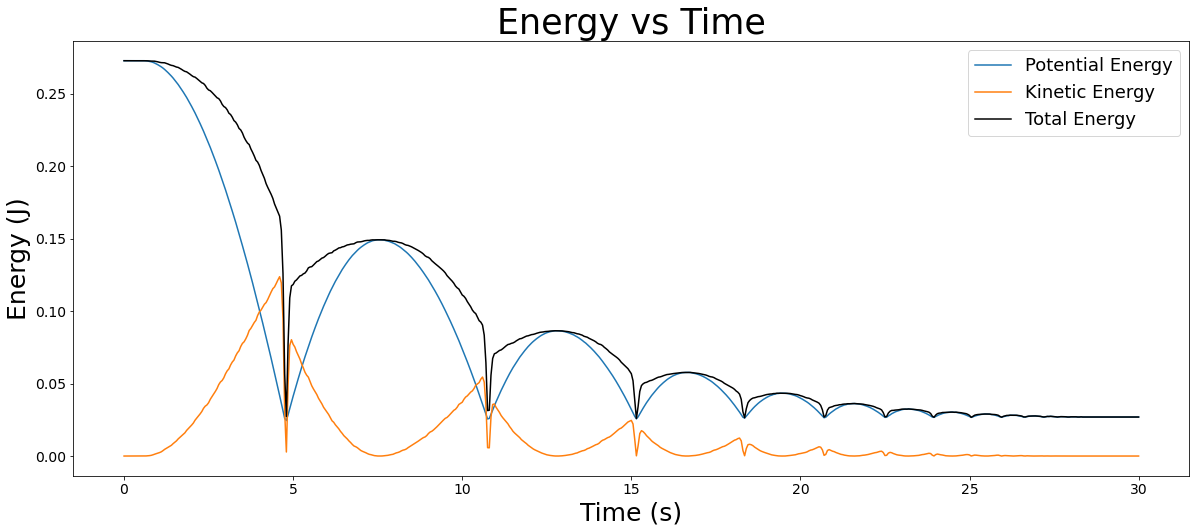

In [46]:
# create the graph
# assign coordinates
x1 = data["Latest: Time (s)"]
y1 = data["Potential Energy (J)"]
x2 = data["Latest: Time (s)"]
y2 = data["Kinetic Energy (J): 1/2mv^2"]
x3 = data["Latest: Time (s)"]
y3 = data["Total Energy(J)"]
plt.plot(x1, y1, label="Potential Energy")
plt.plot(x2, y2, label="Kinetic Energy")
plt.plot(x3, y3, color="black", label="Total Energy")
# chart config
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
# title, labels and legend
plt.title("Energy vs Time", size=35)
plt.xlabel("Time (s)", size=25)
plt.ylabel("Energy (J)", size=25)
plt.legend(prop=dict(size=18))
# display the char
plt.show()
